# Madrid house price prediction

## 1. Contexto


## 2. Datos
Los datos se refieren a las viviendas de la ciudad de Madrid a lo largo de sus 21 distritosun 

### 2.1 Carga de datos

In [114]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Importing ML libraries and metrics
from math import sqrt
from tqdm import tqdm
import lightgbm as lgb
import xgboost as xgb
from lightgbm import early_stopping, log_evaluation
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [115]:
# Ajusta las opciones de visualización
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [116]:
df= pd.read_csv('./data/dfEDA_final.csv',index_col=False)
#dfb= pd.read_csv('./dfEDA_final.csv',index_col=False)

C:\Users\extas\AppData\Local\Temp\ipykernel_10372\4230695949.py:1: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('./data/dfEDA_final.csv',index_col=False)


In [117]:
df.columns.tolist()


['Unnamed: 0',
 'url',
 'm2_constr',
 'distrito',
 'cod_distrito',
 'barrio',
 'cod_barrio',
 'letra_ce',
 'amueblado',
 'planta',
 'dormitorios',
 'banos',
 'balcon',
 'terraza',
 'trastero',
 'ascensor',
 'tipo_inmueble',
 'tiene_armario',
 'cancha_tenis',
 'chimenea',
 'exterior',
 'interior',
 'porton_electrico',
 'videoportero',
 'acceso_discapacidad',
 'precio',
 'web',
 'armarios',
 'codigo_postal',
 'm2_utiles',
 'certificado_energetico',
 'puerta_seguridad',
 'gastos_comunidad',
 'agua_caliente',
 'portero',
 'orientacion_este',
 'orientacion_oeste',
 'orientacion_sur',
 'clasificacion_aire',
 'orientacion_norte',
 'letra_emisiones',
 'tipo_calefaccion',
 'energia_calefaccion',
 'instalacion_calefaccion',
 'num_personas',
 'num_personas_hombres',
 'num_personas_mujeres',
 'total_transacciones',
 'viv_nuevas_transacciones',
 'viv_usadas_transacciones',
 'lineas_metro',
 'num_lineas_buses',
 'renta neta media por persona',
 'renta neta media por hogar',
 'mediana de la renta por

In [118]:
df=df.drop(columns='Unnamed: 0')
# Renombrar una columna
df.rename(columns={'tamaño del hogar (nº de personas en la vivienda)': 'tamano_hogar'}, inplace=True)


In [119]:
df.columns = df.columns.str.replace(' ', '_')

In [120]:
#quitamos la variable euros_m2, no se puede usar
df=df.drop(columns='euros_m2')

In [121]:
# Basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Columns: 125 entries, url to total_estaciones
dtypes: float64(26), int64(86), object(13)
memory usage: 9.5+ MB


In [122]:
# Identifying the unique number of values in the dfset
df.nunique()

url                                          10009
m2_constr                                      551
distrito                                        21
cod_distrito                                    21
barrio                                         131
cod_barrio                                     131
letra_ce                                         8
amueblado                                        4
planta                                          29
dormitorios                                     17
banos                                           13
balcon                                           2
terraza                                          2
trastero                                         2
ascensor                                         2
tipo_inmueble                                    5
tiene_armario                                    2
cancha_tenis                                     2
chimenea                                         2
exterior                       

### 2.2 Análisis de datos

C:\Users\extas\AppData\Local\Temp\ipykernel_10372\3746159673.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['precio'], kde=True, palette='Set1')


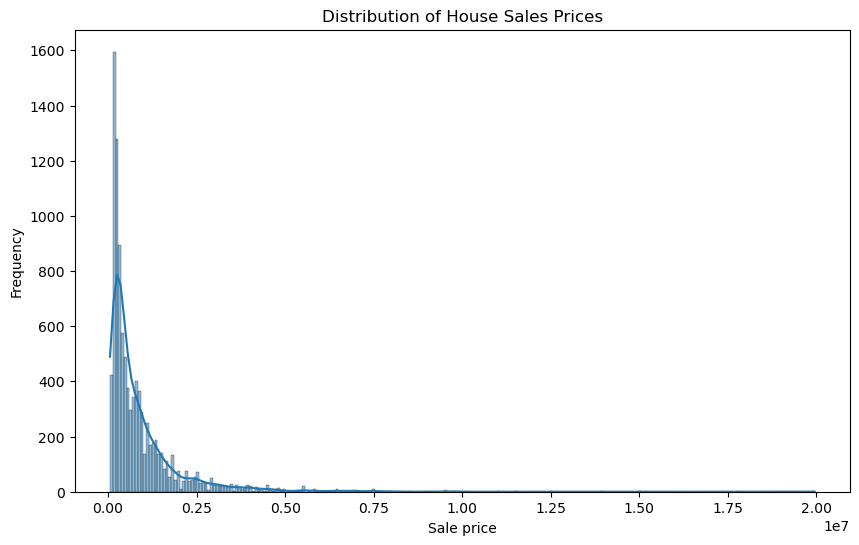

In [123]:
# View the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['precio'], kde=True, palette='Set1')
plt.title('Distribution of House Sales Prices')
plt.xlabel('Sale price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [124]:
# Check for missing values
df.isnull().sum()

url                                             0
m2_constr                                       0
distrito                                        0
cod_distrito                                    0
barrio                                          0
cod_barrio                                      0
letra_ce                                        0
amueblado                                       0
planta                                          0
dormitorios                                     0
banos                                           0
balcon                                          0
terraza                                         0
trastero                                        0
ascensor                                        0
tipo_inmueble                                   0
tiene_armario                                   0
cancha_tenis                                    0
chimenea                                        0
exterior                                        0


In [125]:
# Viewing the df statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
m2_constr,10009.00,138.61,152.04,10.00,68.00,98.00,150.00,4574.00
cod_distrito,10009.00,7.77,5.75,1.00,4.00,6.00,12.00,21.00
cod_barrio,10009.00,81.40,57.63,11.00,41.00,65.00,124.00,215.00
letra_ce,10009.00,0.65,1.40,0.00,0.00,0.00,0.00,7.00
amueblado,10009.00,0.08,0.28,0.00,0.00,0.00,0.00,1.00
planta,10009.00,2.95,2.31,-1.00,2.00,3.00,4.00,28.00
dormitorios,10009.00,2.81,1.43,0.00,2.00,3.00,3.00,24.00
banos,10009.00,2.03,1.29,1.00,1.00,2.00,3.00,13.00
balcon,10009.00,0.08,0.28,0.00,0.00,0.00,0.00,1.00
terraza,10009.00,0.19,0.39,0.00,0.00,0.00,0.00,1.00


### 2.3 Partición en train / test

In [126]:
# Guardamos la  variable target en una variable "target"
target = 'precio'
df[target].head()

0    2000000
1     650000
2     650000
3     599999
4     625000
Name: precio, dtype: int64

In [127]:
# Dividir las columnas objetivo y características, preservando nombres de columnas
dfn = df.select_dtypes(include=['number'])
dfn["url"] = df["url"]
dfmodel=dfn
y = dfmodel[target].values
X = dfmodel.drop(columns=[target, 'url'])

df_ids = dfmodel[['url']]

# Primera clasificación entre train y test
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(X, y, df_ids, test_size=0.3, random_state=42)

# Número de registros del dataset de train y de test
print("Número de observaciones")
print("- Train: ", X_train.shape[0])
print("- Test:  ", X_test.shape[0])
#print("- Val:  ", X_val.shape[0])

dftrain = X_train.reset_index(drop=True)
dftest = X_test.reset_index(drop=True)
#dfval = X_val.reset_index(drop=True)



Número de observaciones
- Train:  7006
- Test:   3003


In [128]:
# Instantiate SimpleImputer
#imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train
#imputer.fit(X_train)

# Transform both X_train and X_test
#X_train_imputed = imputer.transform(X_train)

#
#X_test_imputed = imputer.transform(X_test)

X_train_imputed =X_train
X_test_imputed = X_test

Aplicamos ocho modelos de aprendizaje automático para la tarea de regresión.
Los modelos incluidos son: Regresión Lineal, Árbol de Decisión, Bosque Aleatorio, Regresor KNN, Gradient Boosting, XGBoost, AdaBoost y LightGBM Regressor. 
Cada modelo se entrena y evalua utilizando técnicas de validación cruzada para garantizar una evaluación sólida de su rendimiento.
Se consideran diversas métricas para evaluar la calidad de las predicciones de cada modelo, incluyendo el coeficiente de determinación (R²), el error cuadrático medio (RMSE), entre otros.


In [129]:
# Imprimir todos los nombres de las características
print("Nombres de características antes del entrenamiento:")
print(X_train_imputed.columns)

# Verificar si hay caracteres especiales en los nombres
for feature in X_train_imputed.columns:
    if not feature.isidentifier():
        print(f"Nombre problemático encontrado: {feature}")


Nombres de características antes del entrenamiento:
Index(['m2_constr', 'cod_distrito', 'cod_barrio', 'letra_ce', 'amueblado',
       'planta', 'dormitorios', 'banos', 'balcon', 'terraza',
       ...
       'tipo_suelo_Otros_Materiales', 'tipo_suelo_Parquet_Tarimas',
       'tipo_fachada__Cemento', 'tipo_fachada__Ladrillo',
       'tipo_fachada__Mono_Capa', 'tipo_fachada__Otros_materiales',
       'tipo_fachada__Piedra', 'tipo_fachada_Desconocido',
       'precio_medio_barrio', 'total_estaciones'],
      dtype='object', length=111)


In [130]:
params = {
    'boosting_type': 'gbdt',  # Tipo de boosting
    'objective': 'regression',  # Tipo de tarefa: regressão
    'metric': 'rmse',  # Métrica de avaliação: Root Mean Squared Error
    'device': 'gpu',  # Usar GPU
    'gpu_platform_id': 0,  # ID da plataforma GPU (ajuste se necessário)
    'gpu_device_id': 0,  # ID do dispositivo GPU (ajuste se necessário)
    'num_leaves': 31,  # Número de folhas na árvore
    'learning_rate': 0.05,  # Tasa de aprendizaje
    'n_estimators': 1000,  # Número de estimadores (estimadores)
    'max_depth': -1,  # Profundidade máxima das estimadores (-1 para sem limite)
    'min_child_samples': 20,  # Número mínimo de amostras em um nó filho
    'subsample': 0.8,  # Proporção de amostras para subsampling
    'colsample_bytree': 0.8,  # Proporção de colunas para subsampling
    'reg_alpha': 0.1,  # Regularizaçion L1
    'reg_lambda': 0.1,  # Regularizaçion L2
    'verbose': -1  # Nível de verbosidade (-1 para silenciar)
}
# Creating a list to store the models
models = {"Linear Regression": LinearRegression(),
          "Decision Tree": DecisionTreeRegressor(),
          "Random Forest": RandomForestRegressor(),
          "KNN Regressor": KNeighborsRegressor(),
          "Gradient": GradientBoostingRegressor(),
          "AdaBoost": AdaBoostRegressor(),
          "XGBoost": XGBRegressor(),
          "LGBM Regressor": lgb.LGBMRegressor(**params)
         }

# Loop to create, preprocess, train, and evaluate models
for name, model in tqdm(models.items()):
    
    # Train with imputed data
    model.fit(X_train_imputed, y_train)
    
    # Predict with imputed test data
    predictions = model.predict(X_test_imputed)
    
    # Calculate r2
    r2 = r2_score(y_test, predictions)
    print(f"Model: {name} - R2 Score: {r2}")

  0%|          | 0/8 [00:00<?, ?it/s]

 25%|██▌       | 2/8 [00:00<00:00,  6.02it/s]

Model: Linear Regression - R2 Score: 0.6260354132266843
Model: Decision Tree - R2 Score: 0.6054720019953277


 50%|█████     | 4/8 [00:09<00:10,  2.74s/it]

Model: Random Forest - R2 Score: 0.8169215922009669
Model: KNN Regressor - R2 Score: 0.7502794488961415


 62%|██████▎   | 5/8 [00:12<00:07,  2.49s/it]

Model: Gradient - R2 Score: 0.7852156053990452


 75%|███████▌  | 6/8 [00:13<00:04,  2.01s/it]

Model: AdaBoost - R2 Score: -0.04352646262194737


 88%|████████▊ | 7/8 [00:13<00:01,  1.45s/it]

Model: XGBoost - R2 Score: 0.7888450026512146


100%|██████████| 8/8 [00:30<00:00,  3.86s/it]

Model: LGBM Regressor - R2 Score: 0.8106407324030614


In [134]:

from scipy.stats import randint, uniform
import lightgbm as lgb

regressors = {
     'LinearRegression': {
        'model': LinearRegression(),
        'hyperparameters': {}  # No hyperparameters for basic Linear Regression
    },
    
    'Lasso': {
        'model': Lasso(),
        'hyperparameters': {
            'alpha': uniform(0.01, 10)  # Explore alpha values for L1 regularization
        }
    },
    'XGBoost': {
        'model': XGBRegressor(objective='reg:squarederror', n_jobs=-1),
        'hyperparameters': {
            'max_depth': randint(3, 12),  # Increased max_depth range
            'n_estimators': randint(100, 500),  # Increased n_estimators range
            'learning_rate': [0.001, 0.01, 0.1, 0.2], # Wider range, including smaller values
            'subsample': uniform(0.5, 0.5),  # Changed to uniform distribution, focused on 0.5-1.0
            'colsample_bytree': uniform(0.5, 0.5), # Added colsample_bytree for feature subsampling
            'reg_alpha': [0, 0.1, 1],  # Added L1 regularization
            'reg_lambda': [0, 0.1, 1]  # Added L2 regularization
        }
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'hyperparameters': {
            'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"], # Added criteria
            'max_depth': randint(5, 15),  # Increased max_depth range
            'min_samples_leaf': randint(2, 10),  # Increased min_samples_leaf range
            'min_samples_split': randint(2, 10) # Added min_samples_split for splitting control
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(n_jobs=-1),
        'hyperparameters': {
            'max_depth': randint(5,15),  # Increased max_depth range
            'min_samples_leaf': randint(2, 10),  # Increased min_samples_leaf range
            'n_estimators': randint(50, 200),  # Increased n_estimators range
            'max_features': ['auto', 'sqrt', 'log2'] # Added max_features for feature selection
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'hyperparameters': {
            'max_depth': randint(3, 15),  # Increased max_depth range
            'min_samples_leaf': randint(2, 10),  # Increased min_samples_leaf range
            'learning_rate': [0.001, 0.01, 0.1], # Adjusted learning rates
            'n_estimators': randint(50, 200),  # Increased n_estimators range
            'subsample': uniform(0.5, 0.5) # Added subsample for row subsampling
        }
    },
    'LGMRegressor': {
        'model': LGBMRegressor(),
        'hyperparameters': {
            'boosting_type': 'gbdt',  # Tipo de boosting
            'objective': 'regression',  # Tipo de tarefa: regressão
            'metric': 'rmse',  # Métrica de avaliação: Root Mean Squared Error
            'device': 'gpu',  # Usar GPU
            'gpu_platform_id': 0,  # ID da plataforma GPU (ajuste se necessário)
            'gpu_device_id': 0,  # ID do dispositivo GPU (ajuste se necessário)
            'num_leaves': 31,  # Número de folhas na árvore
            'learning_rate': 0.05,  # Tasa de aprendizaje
            'n_estimators': 1000,  # Número de estimadores (estimadores)
            'max_depth': -1,  # Profundidade máxima das estimadores (-1 para sem limite)
            'min_child_samples': 20,  # Número mínimo de amostras em um nó filho
            'subsample': 0.8,  # Proporção de amostras para subsampling
            'colsample_bytree': 0.8,  # Proporção de colunas para subsampling
            'reg_alpha': 0.1,  # Regularizaçion L1
            'reg_lambda': 0.1,  # Regularizaçion L2
            'verbose': -1,  # Nível de verbosidade (-1 para silenciar)
            'depth': randint(4, 12),  # Increased depth range
            'learning_rate': [0.001, 0.01, 0.1], # Adjusted learning rates
            'iterations': randint(50, 200),  # Increased iterations range
            'l2_leaf_reg': [1, 3, 5, 7, 9] # Added l2_leaf_reg for regularization
        }
    }

}

NameError: name 'Lasso' is not defined

In [ ]:
random_search_output = list()
best_estimators = {}

for reg_name, reg_info in regressors.items():
    print(reg_name)

    reg_random_search = RandomizedSearchCV(
        estimator=reg_info['model'],
        param_distributions=reg_info['hyperparameters'],
        n_iter=20,
        cv=5,
        scoring="neg_mean_squared_error",  # Métrico adecuado para regresión
        return_train_score=True,
        refit=True,
        n_jobs=-1,
        verbose=1,
        error_score='raise'
    )
    reg_random_search.fit(X_train, y_train)

    # Resultados del Random Search
    df_output = pd.DataFrame(reg_random_search.cv_results_)
    df_output['regressor'] = reg_name
    random_search_output.append(df_output)

    # Modelo re-entrenado con los hiperparámetros óptimos
    best_estimators[reg_name] = reg_random_search.best_estimator_


Los resultados indican que el modelo con mejor desempeño es xxxxxxx, logrando un R² de xxxxx%.
A continuación, el xxxxxxx obtuvo un R² del xxxxx%.
Estos resultados reflejan la capacidad de estos modelos para capturar y predecir patrones en los datos de manera efectiva.

8. Features importantes

Analizamos las variables o atributos que tienen un impacto significativo en la predicción o explicación de un resultado específico en un modelo estadístico o de aprendizaje automático. Estas características se seleccionan en función de su capacidad para influir en la variable objetivo y aportar información útil al modelo. 

Existen varias técnicas para determinar qué características son más importantes en un modelo, entre ellas:

1. **Análisis de correlación**: Evalúa la relación entre cada característica y la variable objetivo.

2. **Importancia de variables en modelos basados en árboles**: Modelos como Random Forest, Gradient Boosting y XGBoost proporcionan métricas que indican la importancia relativa de cada característica para la predicción.

3. **Selección de características basada en modelos**: Utiliza algoritmos como la selección progresiva, la eliminación regresiva o LASSO para identificar un subconjunto óptimo de características.

4. **Análisis de Componentes Principales (PCA)**: Transforma las características en un nuevo conjunto de variables no correlacionadas, donde los primeros componentes retienen la mayor parte de la variabilidad de los datos.

5. **Conocimiento del dominio**: El conocimiento especializado sobre el problema puede ser clave para identificar las características importantes.



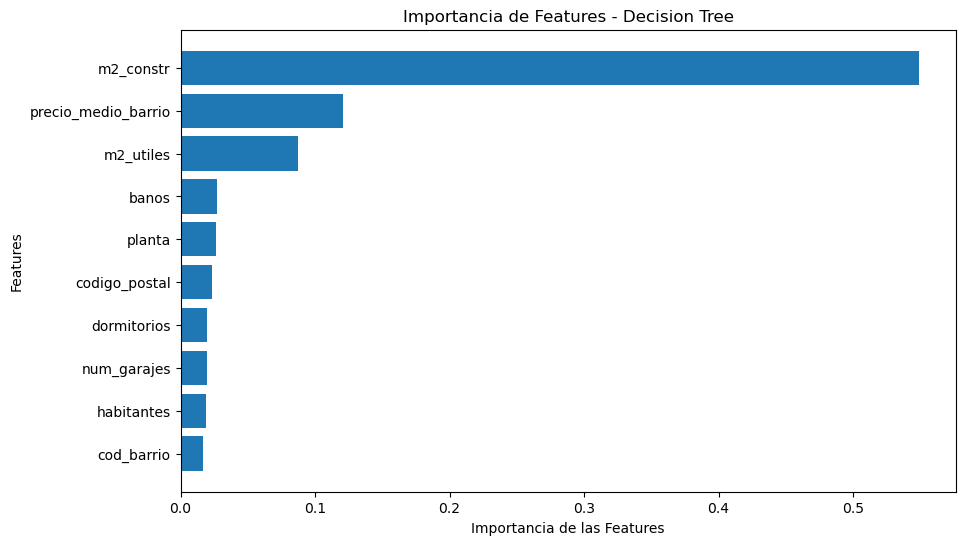

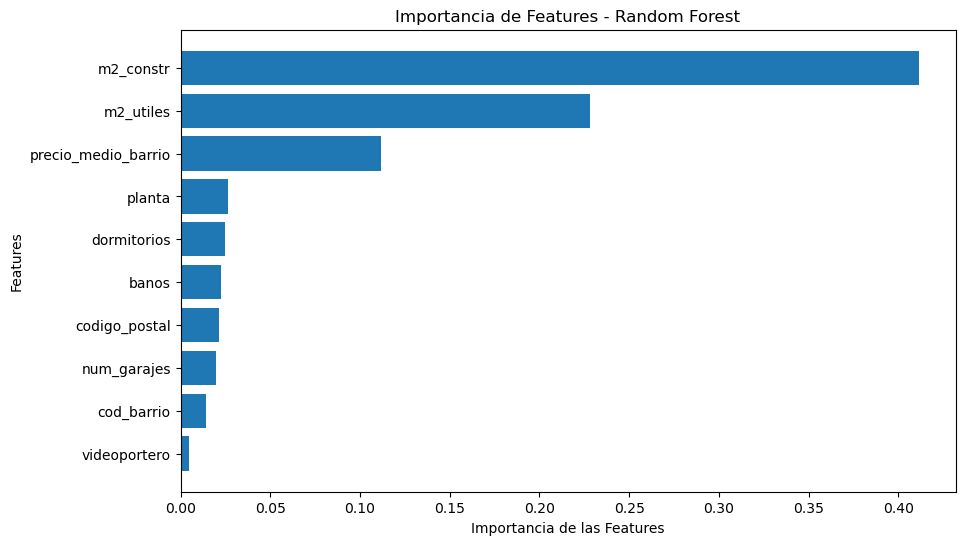

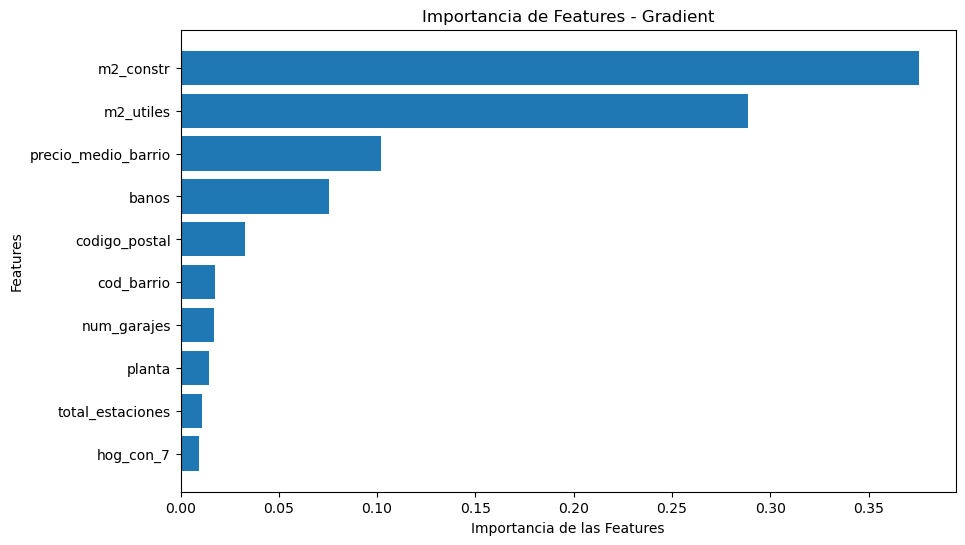

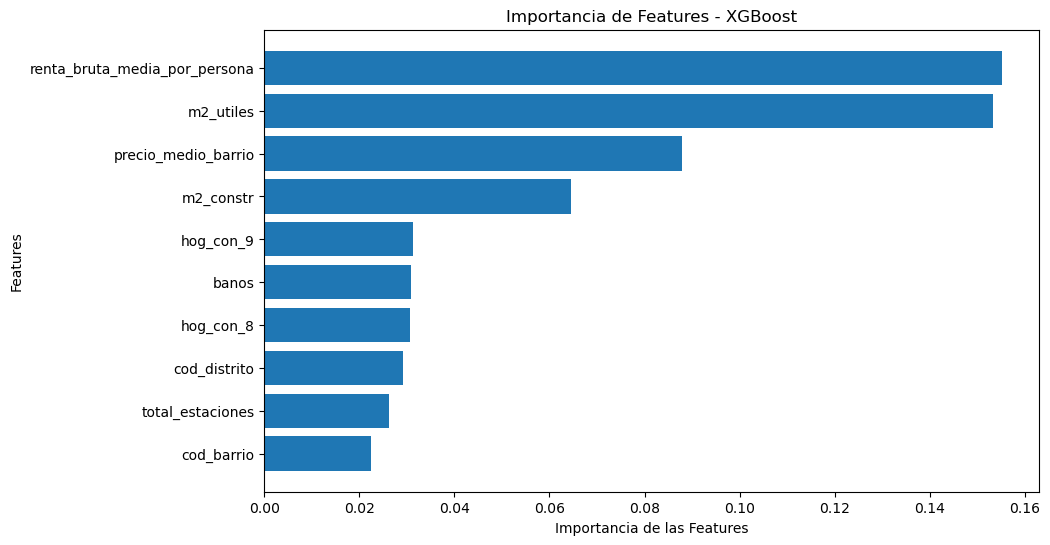

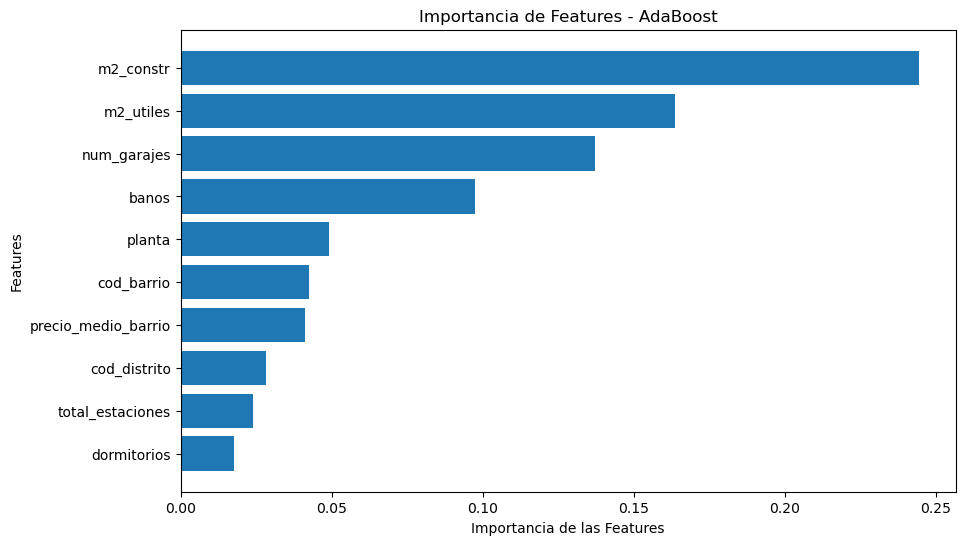

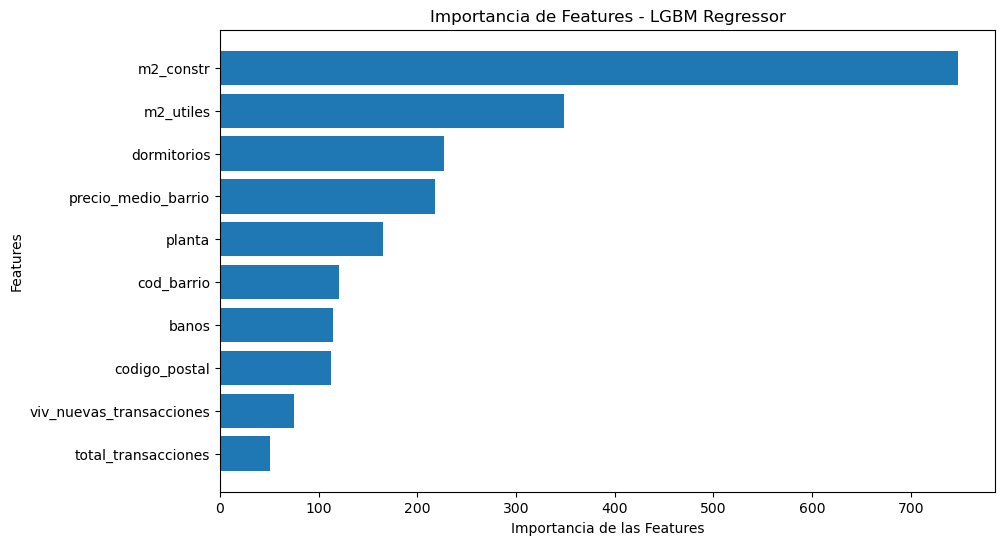

In [132]:
# Template list
models = {
 "Linear Regression": LinearRegression(),
 "Decision Tree": DecisionTreeRegressor(),
 "Random Forest": RandomForestRegressor(),
 "KNN Regressor": KNeighborsRegressor(),
 "Gradient": GradientBoostingRegressor(),
 "XGBoost": XGBRegressor(),
 "AdaBoost": AdaBoostRegressor(),
 "LGBM Regressor": lgb.LGBMRegressor()
}


# Loop para crear y entrenar modelos
for nome, modelo in models.items():
    
    # Entrenar el modelo
    modelo.fit(X_train_imputed, y_train)

    # Comprobar si el modelo tiene el atributo o método 'feature_importances_'
    if hasattr(modelo, 'feature_importances_'):
        
        # Obtener la importancia de las características
        importancias = modelo.feature_importances_

        # Obtener los nombres de las características
        nomes_features = X_train.columns  

        # Ordenar las características y sus importancias
        indices = np.argsort(importancias)
        importancias = importancias[indices]
        nomes_features = nomes_features[indices]

        # Seleccionar las 6 características más importantes
        importancias_top10 = importancias[-10:]
        nomes_features_top10 = nomes_features[-10:]

        # Graficar las 6 características más importantes
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(nomes_features_top10)), importancias_top10, align='center')
        plt.yticks(range(len(nomes_features_top10)), nomes_features_top10)
        plt.xlabel('Importancia de las Features')
        plt.ylabel('Features')
        plt.title(f'Importancia de Features - {nome}')
        plt.grid(False)
        plt.show()
